In [1]:
# Objective:-Prepare a classification model using NaiveBayes for salary data

In [2]:
# Naive Bayes Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
data_train=pd.read_csv("C:\\Users\\hp\\Desktop\\arpit_assignment\\assignment\\9. Naive Bayes\\SalaryData_Train.csv")
data_test=pd.read_csv("C:\\Users\\hp\\Desktop\\arpit_assignment\\assignment\\9. Naive Bayes\\SalaryData_Test.csv")

In [4]:
data_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
data_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

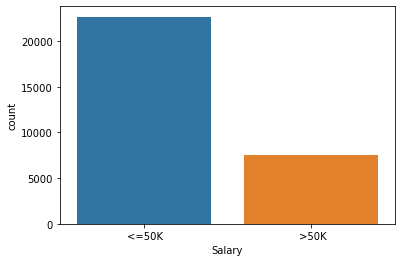

In [8]:
import seaborn as sns
sns.countplot(data_train["Salary"])

<AxesSubplot:>

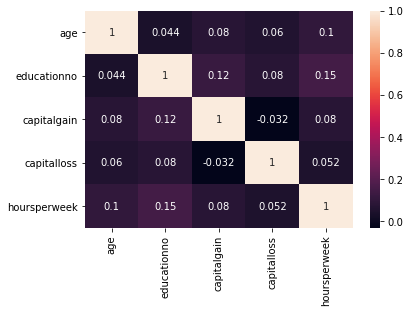

In [9]:
sns.heatmap(data_train.corr(),annot=True) #We can see no good relation b/w the attributes

<AxesSubplot:>

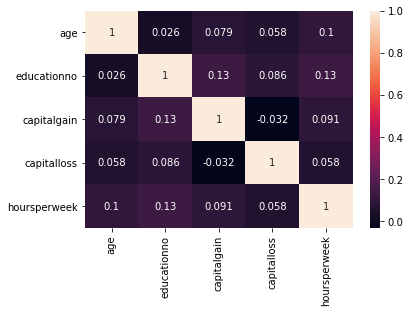

In [10]:
sns.heatmap(data_test.corr(),annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
data_train = data_train.apply(LabelEncoder().fit_transform)
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [12]:
data_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
data_test = data_test.apply(LabelEncoder().fit_transform)
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [14]:
data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [15]:
X_train= data_train
Y_train= data_train['Salary']
print(np.unique(Y_train))
X_train.head()

[0 1]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [16]:
X_test= data_test 
Y_test= data_test['Salary']
print(np.unique(Y_test))
X_test.head()

[0 1]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [17]:
X_train.shape,Y_train.shape

((30161, 14), (30161,))

In [18]:
X_test.shape,Y_test.shape

((15060, 14), (15060,))

In [19]:

# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB                          



# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train,Y_train)
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==Y_train) # 98%

test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m==Y_test) # 96%

In [20]:
accuracy_train_m,accuracy_test_m

(0.7803454792612977, 0.7827357237715803)

In [21]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(X_train,Y_train) 
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_g==Y_train) # 95%

test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g==Y_test) # 8%

In [22]:
accuracy_train_g,accuracy_test_g

(1.0, 1.0)

In [23]:
clf = GB()
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 100.0


array([[11360,     0],
       [    0,  3700]], dtype=int64)

In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



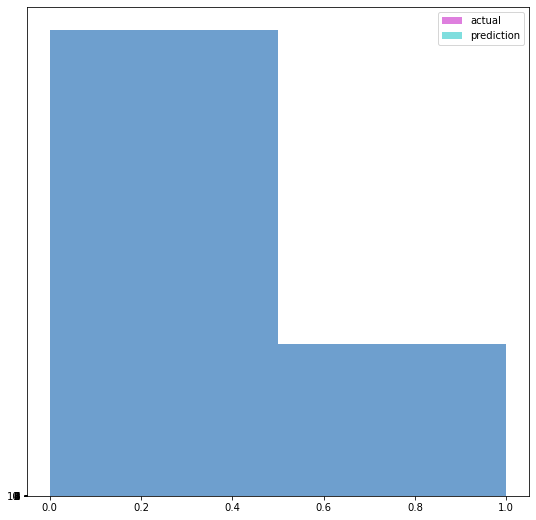

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=2)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:-Gaussian Naive Bayes giving the best result with 100% accuracy so we will proceed further with GB